In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\Programming\ML_DATA\\heart failure.csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [6]:
# percentage calculate for DEATH_EVENT

no = (203 / (203+96)) * 100 
yes = (96 / (203+96)) * 100

In [7]:
no

67.89297658862876

In [8]:
yes

32.10702341137124

In [9]:
# This data is an imbalanced dataset
# 67.89297658862876 % for NO 
# 32.10702341137124 % for Yes 

# Data visualization

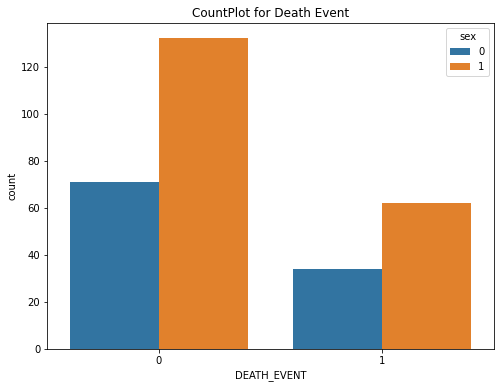

In [10]:
plt.figure(figsize=(8,6))
sns.countplot(x='DEATH_EVENT',data=df,hue='sex')
plt.title("CountPlot for Death Event")
plt.show()

# training test split for ML model

In [11]:
x = df.drop('DEATH_EVENT',axis=1)
y = df.DEATH_EVENT

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=51)

In [14]:
x_train

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
284,50.0,1,54,0,40,0,279000.0,0.8,141,1,0,250
7,60.0,1,315,1,60,0,454000.0,1.1,131,1,1,10
264,61.0,0,582,1,38,0,147000.0,1.2,141,1,0,237
223,47.0,0,582,0,25,0,130000.0,0.8,134,1,0,201
126,46.0,0,168,1,17,1,271000.0,2.1,124,0,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...
222,42.0,1,86,0,35,0,365000.0,1.1,139,1,1,201
16,87.0,1,149,0,38,0,262000.0,0.9,140,1,0,14
197,65.0,0,167,0,30,0,259000.0,0.8,138,0,0,186
224,58.0,0,582,1,25,0,504000.0,1.0,138,1,0,205


In [15]:
y_train

284    0
7      1
264    0
223    0
126    1
      ..
222    0
16     1
197    0
224    0
57     0
Name: DEATH_EVENT, Length: 209, dtype: int64

# Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
clf = DecisionTreeClassifier()

In [18]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [19]:
clf.predict(x_test)

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0], dtype=int64)

In [20]:
clf.score(x_test,y_test)

0.8111111111111111

# Random_forest Classifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
clf2 = RandomForestClassifier()

In [23]:
clf2.fit(x_train,y_train)

RandomForestClassifier()

In [24]:
clf2.score(x_test,y_test)

0.8888888888888888

# Hyper Parameter Tuning

In [25]:
trees = np.random.randint(15,200,25)

In [26]:
trees

array([ 30,  45, 167,  75,  99, 161,  57,  73, 128, 154, 190, 140,  91,
        54,  39, 197,  32,  61, 191,  21, 194, 156, 184, 159,  85])

In [27]:
criterion = ['gini','entropy']
max_depth = np.random.randint(1,15,20)
min_samples_split = [2,3,4]
max_features = ['sqrt','log2']

In [28]:
ids = {
    'n_estimators' : trees,
    'criterion' : criterion,
    'max_depth' : max_depth,
    'min_samples_split' : min_samples_split,
    'max_features' : max_features
}

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
gcv = GridSearchCV(clf2,ids,n_jobs=10,cv=3)

In [31]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  9, 11,  7,  4,  5,  4,  2, 13, 12,  4, 13, 11, 12, 10,  1,  9,
        7,  9,  9]),
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': array([ 30,  45, 167,  75,  99, 161,  57,  73, 128, 154, 190, 140,  91,
        54,  39, 197,  32,  61, 191,  21, 194, 156, 184, 159,  85])})

In [34]:
gcv.cv_results_

{'mean_fit_time': array([0.16723657, 0.27123809, 1.37133265, ..., 0.68006714, 0.55247704,
        0.31504146]),
 'std_fit_time': array([0.02622013, 0.04397191, 0.06616814, ..., 0.07523575, 0.0456017 ,
        0.03742236]),
 'mean_score_time': array([0.02266788, 0.02000594, 0.12431256, ..., 0.03951605, 0.03753416,
        0.02107247]),
 'std_score_time': array([0.00308198, 0.00215715, 0.00756551, ..., 0.00333715, 0.00541921,
        0.00140013]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[2, 2, 2, ..., 9, 9, 9],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_features': masked_array(data=['sqrt', 'sqrt', 'sqrt', ..., 'log2', 'log2', 'log2'],
              mask=[False, Fa

In [36]:
cv_result = pd.DataFrame(gcv.cv_results_)

In [39]:
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_features,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.167237,0.026220,0.022668,0.003082,gini,2,sqrt,2,30,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.771429,0.771429,0.811594,0.784817,0.018934,5677
1,0.271238,0.043972,0.020006,0.002157,gini,2,sqrt,2,45,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.828571,0.771429,0.855072,0.818357,0.034903,5192
2,1.371333,0.066168,0.124313,0.007566,gini,2,sqrt,2,167,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.800000,0.814286,0.840580,0.818288,0.016807,5221
3,0.456918,0.101949,0.027336,0.012500,gini,2,sqrt,2,75,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.800000,0.785714,0.840580,0.808765,0.023240,5407
4,0.604570,0.130320,0.039597,0.007502,gini,2,sqrt,2,99,"{'criterion': 'gini', 'max_depth': 2, 'max_fea...",0.842857,0.757143,0.855072,0.818357,0.043572,5192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.922963,0.164465,0.061251,0.011445,entropy,9,log2,4,194,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.857143,0.871429,0.855072,0.861215,0.007272,514
5996,0.692399,0.199759,0.041896,0.009501,entropy,9,log2,4,156,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.885714,0.885714,0.811594,0.861008,0.034941,1071
5997,0.680067,0.075236,0.039516,0.003337,entropy,9,log2,4,184,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.842857,0.871429,0.855072,0.856453,0.011705,1149
5998,0.552477,0.045602,0.037534,0.005419,entropy,9,log2,4,159,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.885714,0.871429,0.826087,0.861077,0.025420,875


In [38]:
cv_result.shape

(6000, 16)

In [40]:
gcv.best_score_

0.8899240855762595

In [41]:
gcv.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 140}

In [61]:
clf3 = RandomForestClassifier(
    criterion = 'entropy', 
    max_depth = 5,
    max_features = 'log2',
    min_samples_split = 2,
    n_estimators = 140
)

In [62]:
clf3.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       n_estimators=140)

In [63]:
clf3.score(x_train,y_train) # Training Data Accuracy is 0.9234449760765551

0.9234449760765551

In [64]:
clf3.score(x_test,y_test) # Test Data Accuracy is 0.8666666666666667

0.8666666666666667

In [65]:
# Another Way 

clf4 = gcv.best_estimator_

In [66]:
clf4

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       n_estimators=140)

In [67]:
clf4.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, max_features='log2',
                       n_estimators=140)

In [68]:
clf4.score(x_test,y_test)

0.8777777777777778

In [69]:
clf.score(x_test,y_test) # Before tuning test accuracy ( 0.8111111111111111 ) 

0.8111111111111111

In [70]:
clf2.score(x_test,y_test) # Without tuning test accuracy ( 0.8888888888888888 ) 

0.8888888888888888

In [71]:
clf4.score(x_test,y_test) # With tuning test accuracy (0.8777777777777778 ) 

0.8777777777777778